# Models selection


Maintenant que nous avons créer des features grâce à l'étude du domaine métier et à l'EDA, et que nous les avons sélectionnées grâce à Boruta, nous pouvons passer à la phase de selection du ou des modèles les plus adaptées à notre dataset.

L'EDA soulève quelques intérogations à ce sujet mais le meilleur moyen reste de tester une variété de modèles avec quelques combinaisons de leurs hyperparamètres.

Un mot sur les hyperparamètres : pour le learning rate ou la régularisation, ajouter 0.1 à 0.01 à un effet important sur le comportement du modèle, en revanche ajouter 0.1 à 10 n'a pratiquement aucune conséquence. Ainsi, pour le learning rate, nous devrions priviliégier un distribution logarithmique du paramètre.

In [3]:
# from run_regression import run_linear_models, run_svm_models, run_neighbor_models, run_gaussian_models, run_nn_models, run_tree_models
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import pickle
import xgboost as xgb
import seaborn as sns
from typing import List
import scipy.stats as stats
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train = pd.read_csv('../data/train.csv', index_col='date')
test = pd.read_csv('../data/test.csv', index_col='date')

In [5]:
y_train = train.reel
X_train = train.drop(['reel'], axis=1)
y_test = test.reel
X_test = test.drop(['reel'], axis=1)

In [6]:
X_test.head()

,prevision,cantine_nom,annee_scolaire,effectif,quartier_detail,prix_quartier_detail_m2_appart,prix_moyen_m2_appartement,prix_moyen_m2_maison,longitude,latitude,depuis_vacances,depuis_ferie,depuis_juives,ramadan_dans,depuis_ramadan,year,day_of_week_sin,day_of_year_sin,day_of_year_cos,week_sin,freq_reel_%,freq_reel_%_std
date,,,,,,,,,,,,,,,,,,,,,,
2018-09-03,-0.616667,-0.465192,-1.522069,-0.914241,0.416639,1.879255,2.053797,2.568709,0.000818,-0.520939,-1.383938,-0.421958,0.571805,1.877107,-0.630534,-1.369691,0.000722,-0.977215,-0.763611,-1.046337,0.528764,1.122534
2018-09-03,0.749616,-1.672087,-0.392492,0.454462,-0.800162,1.712932,1.167674,1.523661,-0.197141,0.178182,-1.383938,-0.421958,0.571805,1.877107,-0.630534,-1.369691,0.000722,-0.977215,-0.763611,-1.046337,-0.711374,-0.465377
2018-09-03,-0.482479,-1.023781,-0.016829,1.453245,0.523386,-0.056357,-0.204867,0.166957,0.155225,-0.085421,-1.383938,-0.421958,0.571805,1.877107,-0.630534,-1.369691,0.000722,-0.977215,-0.763611,-1.046337,-1.107440,-0.787171
2018-09-03,1.408360,-1.672087,0.624849,0.195518,-0.800162,1.712932,1.167674,1.523661,-0.197141,0.178182,-1.383938,-0.421958,0.571805,1.877107,-0.630534,-1.369691,0.000722,-0.977215,-0.763611,-1.046337,-0.711374,-0.465377
2018-09-03,1.261972,-0.241889,1.739077,-0.599810,0.613371,-0.514348,-0.640527,0.166957,-0.703914,-1.466472,-1.383938,-0.421958,0.571805,1.877107,-0.630534,-1.369691,0.000722,-0.977215,-0.763611,-1.046337,0.911384,1.330350


## 1. Les modèles linéaires

In [14]:
# run_linear_models(X_train, y_train, small = True, normalize_x = False)

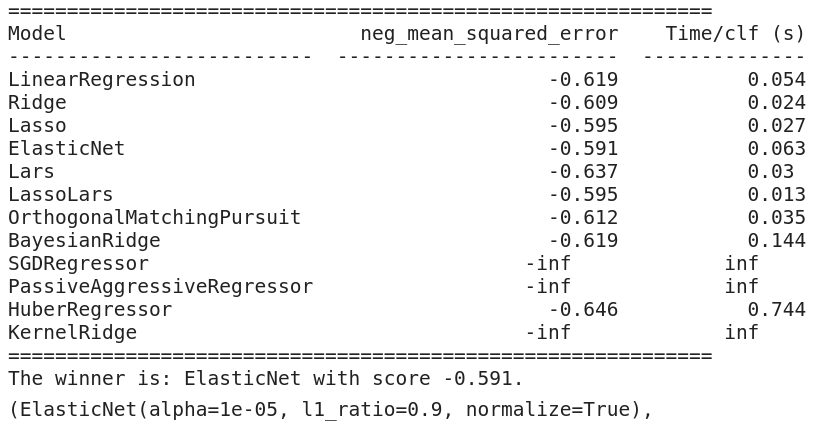

## 2. Les modèles support vector machines (SVM)

De la documentation de Scikit-learn : 

La complexité du temps d'ajustement du modèle SVR est plus que quadratique avec le nombre d'échantillons, ce qui rend difficile l'adaptation à des ensembles de données de plus de 10 000 échantillons. Pour les grands ensembles de données, envisagez d'utiliser LinearSVR ou SGDRegressor à la place, éventuellement après un transformateur Nystroem.

Ici, vu la taille de notre dataset, nous utilisons le modèle LinearSVR uniquement.

In [13]:
# run_svm_models(X_train, y_train, small = True, normalize_x = False)

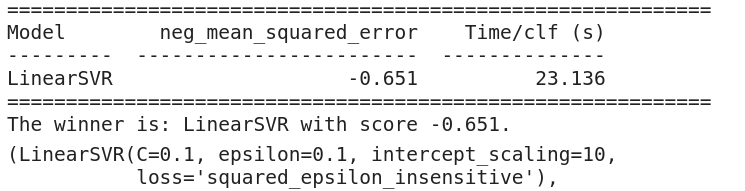

LinearSVR n'apporte pas d'amélioration par rapport à LassoLars

## 3. Les modèles basés sur les distances

In [15]:
# run_neighbor_models(X_train, y_train, normalize_x = False)

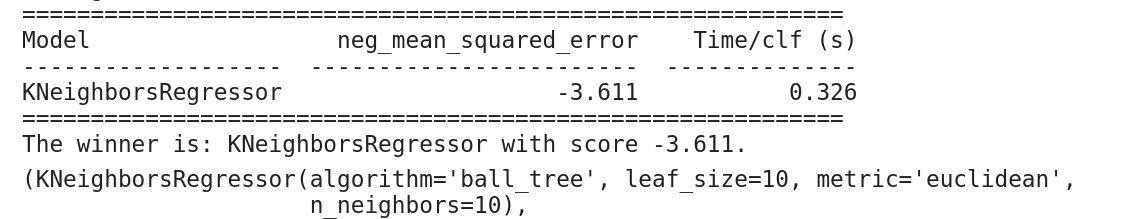

KNN est, dans le cadre de ce jeu de données, relativement mauvais par rapport aux modèles précédement testés.

## 4. Les modèles gaussiens

In [18]:
# run_gaussian_models(X_train, y_train, small = True, normalize_x = False)

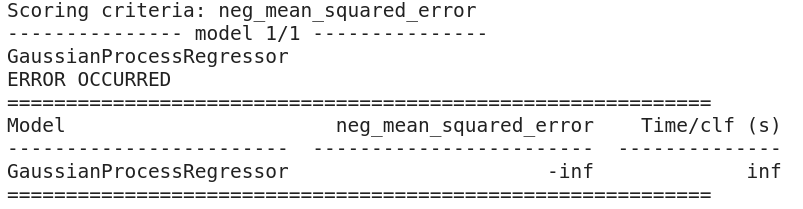

Tout comme SVM avant, ce modèle nécessite une grande quantité de RAM car son implémentation dans Scikit-learn demande de calculer une matrice de covarriance sur l'ensemble du train set. Au vu de notre large dataset, cela n'est pas réalisable ici. Tout comme SVM, nous pourrions probablement tenter une approche d'entraînement par batch.

## 5. Les réseaux de neuronnes

In [17]:
# run_nn_models(X_train, y_train, small = True, normalize_x = False)

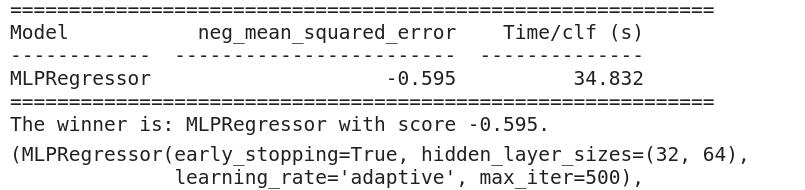

MLPRegressor obtient des résultats solides dans la veine des modèles linéaires.

## 6. Les modèles à base d'arbres de décision

In [16]:
# run_tree_models(X_train, y_train, small = True, normalize_x = False)

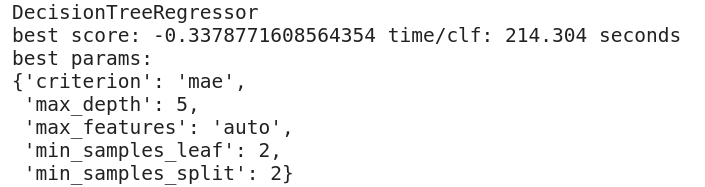

De façon assez suprenante un simple arbre de décision obtient le meilleur score jusqu'à présent. Une bonne idée est de continuer dans la direction de modèles plus perfectionnés à base d'arbres. 

## 7. Les modèles ensemblistes (bagging)

In [ ]:
run_ensemble_models(X_train, y_train, small = True, normalize_x = False)

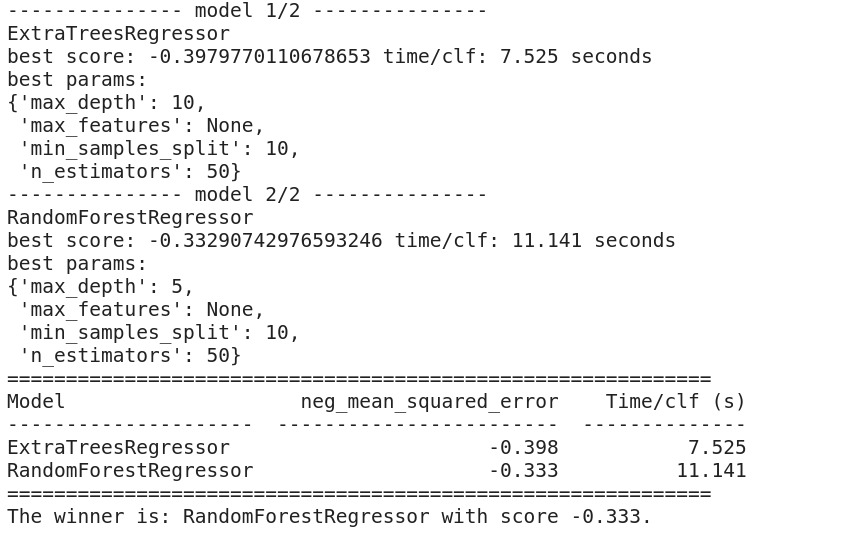

<br>

La tendance est confirmée par ce run, il semblerait que les modèles à base d'arbres soient de bon candidats sur ce jeu de données. Voyons maintenant la technique du boosting.

## 8. Les modèles ensemblistes (boosting) : XGBoost et LGBM

Xgboost et LGBM ne sont pas encore implémentés dans mon package de sélection de modèle, on opère donc une randomized search manuelle.

In [85]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import time

# n_estimators doit être tune plus tard 
# car les paramètres échantillonnés avec des n_estimators plus élevés
# obtiendront un avantage injuste (default=100)
params = {
    'n_estimators': [100, 150, 250, 500],
    'min_child_weight': [2, 4, 6],
    'gamma': [i/10.0 for i in range(2, 6)],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

reg = XGBRegressor(seed=42)

n_iter_search = 100
cv_ts = TimeSeriesSplit(n_splits=3)
random_search = RandomizedSearchCV(reg, param_distributions=params, verbose = 2,
                                   n_iter=n_iter_search, cv=cv_ts, scoring='neg_mean_squared_error', random_state=42)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=250; total time=   1.2s
[CV] END gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=250; total time=   2.6s
[CV] END gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=250; total time=   3.5s
[CV] END gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=6, n_estimators=250; total time=   0.8s
[CV] END gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=6, n_estimators=250; total time=   1.5s
[CV] END gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=6, n_estimators=250; total time=   2.1s
[CV] END gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=250; total time=   1.6s
[CV] END gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=250; total time=   2.4s
[CV] END gamma=0.4, learning_rate=0.05, max_depth=5, min_child_

[CV] END gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100; total time=   0.8s
[CV] END gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100; total time=   1.8s
[CV] END gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100; total time=   2.7s
[CV] END gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=500; total time=   4.2s
[CV] END gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=500; total time=   9.3s
[CV] END gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=4, n_estimators=500; total time=  18.4s
[CV] END gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=150; total time=   1.4s
[CV] END gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=150; total time=   3.2s
[CV] END gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=4, n_estimators=150; total time=   4.4s
[CV] END gamma=0

[CV] END gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=500; total time=   1.9s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=500; total time=   3.6s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=500; total time=   5.2s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=250; total time=   2.6s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=250; total time=   5.4s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=8, min_child_weight=4, n_estimators=250; total time=   9.4s
[CV] END gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=250; total time=   1.6s
[CV] END gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=250; total time=   2.6s
[CV] END gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=4, n_estimators=250; total time=   4.4s
[CV] END gamm

[CV] END gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=150; total time=   1.1s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=150; total time=   6.8s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=150; total time=   2.8s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=150; total time=   0.5s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=150; total time=   1.1s
[CV] END gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=150; total time=   1.9s
[CV] END gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=500; total time=   4.7s
[CV] END gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=500; total time=   9.8s
[CV] END gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=500; total time=  16.2s
[CV] END g

RandomizedSearchCV took 955.05 seconds for 100 candidates parameter settings.


In [118]:
best_xgbr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, monotone_constraints='()',
             n_estimators=95, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

best_xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=95, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

def print_metrics(y_true, y_predicted):

    print('Root Mean Square Error            = ' +
          str(np.sqrt(mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error               = ' +
          str(mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error             = ' +
          str(median_absolute_error(y_true, y_predicted))) 

y_pred = best_xgbr.predict(X_test)
print_metrics(y_test**2, y_pred**2)

Root Mean Square Error            = 22.122820724498332
Mean Absolute Error               = 16.154971986274795
Median Absolute Error             = 12.76448690834031


In [120]:
pickle.dump(best_xgbr, open('models/best_xgbr.sav', 'wb'))

In [76]:
import lightgbm as lgb

# n_estimators doit être tune plus tard
# car les paramètres échantillonnés avec des n_estimators plus élevés
# obtiendront un avantage injuste (default=100)
params = {
    'n_estimators': [100, 150, 250, 500],
    'num_leaves':  [8, 32, 64, 128, 256],
    'max_depth': [3, 5, 8],
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'learning_rate': [0.01, 0.05,  0.1, 0.2]}
 
lgbr = lgb.LGBMRegressor(seed=42)

n_iter_search = 100
random_search = RandomizedSearchCV(lgbr, param_distributions=params, verbose=2,
                                   n_iter=n_iter_search, cv=cv_ts, scoring='neg_mean_squared_error', random_state=42)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END boosting_type=dart, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=8; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=8; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=8; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=8; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=8; total time=   1.3s
[CV] END boosting_type=dart, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=8; total time=   1.7s
[CV] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=256; total time=   1.6s
[CV] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=256; total time=   2.0s
[CV] END boosting_type=gbdt, 

[CV] END boosting_type=dart, learning_rate=0.2, max_depth=8, n_estimators=500, num_leaves=128; total time=   5.4s
[CV] END boosting_type=dart, learning_rate=0.2, max_depth=8, n_estimators=500, num_leaves=128; total time=   9.6s
[CV] END boosting_type=dart, learning_rate=0.2, max_depth=8, n_estimators=500, num_leaves=128; total time=  13.5s
[CV] END boosting_type=dart, learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=128; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=128; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=128; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.01, max_depth=3, n_estimators=250, num_leaves=256; total time=   0.8s
[CV] END boosting_type=dart, learning_rate=0.01, max_depth=3, n_estimators=250, num_leaves=256; total time=   1.9s
[CV] END boosting_type=dart, learning_rate=0.01, max_depth=3, n_estimators=250, num

[CV] END boosting_type=goss, learning_rate=0.1, max_depth=8, n_estimators=250, num_leaves=32; total time=   0.8s
[CV] END boosting_type=goss, learning_rate=0.1, max_depth=8, n_estimators=250, num_leaves=32; total time=   1.1s
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=3, n_estimators=500, num_leaves=64; total time=   0.4s
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=3, n_estimators=500, num_leaves=64; total time=   0.8s
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=3, n_estimators=500, num_leaves=64; total time=   1.0s
[CV] END boosting_type=goss, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=64; total time=   0.4s
[CV] END boosting_type=goss, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=64; total time=   0.5s
[CV] END boosting_type=goss, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=64; total time=   0.7s
[CV] END boosting_type=goss, learning_rate=0.2, max_depth=3, n_estimators=250, num_leaves=

[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=5, n_estimators=100, num_leaves=32; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=64; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=64; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=64; total time=   0.8s
[CV] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=150, num_leaves=128; total time=   0.3s
[CV] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=150, num_leaves=128; total time=   0.3s
[CV] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=150, num_leaves=128; total time=   0.4s
[CV] END boosting_type=goss, learning_rate=0.01, max_depth=8, n_estimators=500, num_leaves=32; total time=   1.4s
[CV] END boosting_type=goss, learning_rate=0.01, max_depth=8, n_estimators=500, num_leaves=

[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=3, n_estimators=500, num_leaves=32; total time=   0.7s
[CV] END boosting_type=gbdt, learning_rate=0.01, max_depth=3, n_estimators=100, num_leaves=64; total time=   0.1s
[CV] END boosting_type=gbdt, learning_rate=0.01, max_depth=3, n_estimators=100, num_leaves=64; total time=   0.2s
[CV] END boosting_type=gbdt, learning_rate=0.01, max_depth=3, n_estimators=100, num_leaves=64; total time=   0.2s
[CV] END boosting_type=goss, learning_rate=0.05, max_depth=3, n_estimators=150, num_leaves=128; total time=   0.2s
[CV] END boosting_type=goss, learning_rate=0.05, max_depth=3, n_estimators=150, num_leaves=128; total time=   0.2s
[CV] END boosting_type=goss, learning_rate=0.05, max_depth=3, n_estimators=150, num_leaves=128; total time=   0.3s
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=256; total time=   0.7s
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_

In [80]:
best_lgbr = lgb.LGBMRegressor(max_depth=5, n_estimators=150, num_leaves=8)
best_lgbr.fit(X_train, y_train)

LGBMRegressor(max_depth=5, n_estimators=150, num_leaves=8)

In [81]:
y_pred = best_lgbr.predict(X_test)
print_metrics(y_test**2, y_pred**2)

Root Mean Square Error            = 22.094410468949704
Mean Absolute Error               = 15.99914128977054
Median Absolute Error             = 12.415289455391928


In [84]:
pickle.dump(best_lgbr, open('models/best_lgbr.sav', 'wb'))

On observe des résulats très solides de la part de XGBoost et LGBM.

## Conclusion

Mon package de sélection de modèle a rendu ses conclusions. Encore une fois, celui-ci n'est pas omniscient et est encore très perfectible. En effet, il est tout simplement impossible de créer un package qui balaye de façon exhaustive tous les espaces d'hyperparamètres et ce pour chaque jeu de données. Cependant, c'est un outil riche d'enseignement quant au type de modèle à utiliser pour tel ou tel dataset. Ici très clairement les modèles à base d'arbres sont les grands gagnants et cela n'est pas si surprenant car on l'a constaté lors de l'EDA, les relations entre les prédicteurs et la variable indépendantes ne sont la plupart du temps pas linéaires, mais bien plus complexes.

Afin d'aller au bout des choses, il serait intéressant de retenir les principaux modèles sélectionnés et des les tuner avec une autre technique que Gridsearch : l'optimisation Bayésienne. De plus, il serait utile de tenter des méthodes d'aggrégation de modèles afin de voir si l'on peut encore progresser en terme de performance.

Les modèles avec lesquels je souhaite poursuivre l'exploration :
- ElasticNet et LassoLars
- Multilayer perceptron
- Decision Tree
- Random Forest
- XGBoost et LightGBM
